# Ejercicio de machine learning de clasificación, modelo supervisado

Este notebook consta de las siguientes partes:

- Importación de librerías y carga del archivo



- EXPLORACION DE DATOS - EDA (Exploratory Data Analysis) : duplicados, valores missing, estadísticas, correlación entre variables, gráficos de representación, outliers.


 
Este dataset (mpg) contiene el consumo de combustible en millas por galón ( miles per gallon)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Importación de librerías y carga del archivo

In [1]:
# importación librerías
import numpy as np
import pandas as pd 

In [2]:
# Importación del archivo, directamente de internet
url ="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv"
df = pd.read_csv(url)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [3]:
# info para saber qué estructura estamos manejando
type(df)

pandas.core.frame.DataFrame

In [4]:
# para este modelo clasificador vamos a pasar la target a binaria, para dotar de sencillez el ejemplo; así que "origin" 
# será sólo USA y Japan.
df.origin= df.origin.replace({"europe": "japan"
                              })

In [5]:
# Comprobación del cambio
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


In [6]:
# Eliminamos la feature "model_year", ya que no la necesitamos para el análisis.
df.drop(["model_year"],axis=1,inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,usa,amc ambassador dpl


================================================================================================================

EXPLORACION DE DATOS - EDA (Exploratory Data Analysis)

In [7]:
# características básicas del dataframe: número de registros (398), número de columnas(8), número total valores
# no nulos para cada feature (algo pasa en "horsepower"), tipo de dato que panda usa para representar los valores 
# (float64, object...), memoria ram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      392 non-null float64
weight          398 non-null int64
acceleration    398 non-null float64
origin          398 non-null object
name            398 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 25.0+ KB


In [8]:
# encontrar y mostrar duplicados
df[df.duplicated()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
29,27.0,4,97.0,88.0,2130,14.5,japan,datsun pl510


In [9]:
# limpiar el dataset de duplicados
df.drop_duplicates(inplace=True)

In [10]:
# checked de la suma de duplicados
df.duplicated().sum()

0

In [11]:
# nueva info sin duplicados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      391 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
origin          397 non-null object
name            397 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 27.9+ KB


In [12]:
# chequeo valores nulos por columnas (aunque ya se había visto con df.info())
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
origin          0
name            0
dtype: int64

In [13]:
# Chequeado este dato con el equipo que nos ha dado la información, nos comentan que imputemos la media a estos 6 valores nulos
mean = df["horsepower"].mean()
df["horsepower"].replace(np.NaN,mean, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.000000,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.000000,3693,11.5,usa,buick skylark 320
2,18.0,8,318.0,150.000000,3436,11.0,usa,plymouth satellite
3,16.0,8,304.0,150.000000,3433,12.0,usa,amc rebel sst
4,17.0,8,302.0,140.000000,3449,10.5,usa,ford torino
5,15.0,8,429.0,198.000000,4341,10.0,usa,ford galaxie 500
6,14.0,8,454.0,220.000000,4354,9.0,usa,chevrolet impala
7,14.0,8,440.0,215.000000,4312,8.5,usa,plymouth fury iii
8,14.0,8,455.0,225.000000,4425,10.0,usa,pontiac catalina
9,15.0,8,390.0,190.000000,3850,8.5,usa,amc ambassador dpl


In [14]:
# Checked no nulos
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
origin          0
name            0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 397
Data columns (total 8 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
origin          397 non-null object
name            397 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 27.9+ KB


In [16]:
# Resumen estadístico. Aquí no aparece la feature name por ser categórica.
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.505793,5.458438,193.668766,104.511509,2972.541562,15.570781
std,7.823882,1.701577,104.288616,38.238410,846.855265,2.760646
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.500000,4.000000,105.000000,76.000000,2226.000000,13.800000
50%,23.000000,4.000000,151.000000,95.000000,2807.000000,15.500000
75%,29.000000,8.000000,262.000000,125.000000,3609.000000,17.200000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000


Aquí tenemos información que puede ser interesante 
* **count** Contabiliza todos aquellos valores que no son NaN (en nuestro caso, todos los valores -397)
* **mean** Calcula la media de los valores para cada feature 
* **min** Obtiene el mínimo valor para cada feature.
* **max** Obtiene el máximo valor para cada feature.
* **std** Muestra la desviación estándar proporcionando una medida de la dispersión de los valores con respecto a la media (mean), cuanto mayor sea la desviación estándar, menos representativa será la media de la distribución (en nuestro caso, será menos representativa la media en las features: displacement, weight, horsepower). Nos puede dar pie a pensar que hay outliers
* **25%**,**50%**,**75%** Los cuartiles representan el valor por debajo del cual se situan un determinado porcentaje de los valores para una determinada feature.(Podemos ver que en las features  displacement, weight, horsepower, su máximo valor presente es bastante alto en relación a su 50% y se pueden deducir algunos outliers).

In [17]:
# mediana, que es exacta al cuartil 50%, Q2.
df.median()

mpg               23.0
cylinders          4.0
displacement     151.0
horsepower        95.0
weight          2807.0
acceleration      15.5
dtype: float64

In [18]:
# librerías de visualización  
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [19]:
print("Matplotlib version " + matplotlib.__version__)

Matplotlib version 2.2.3


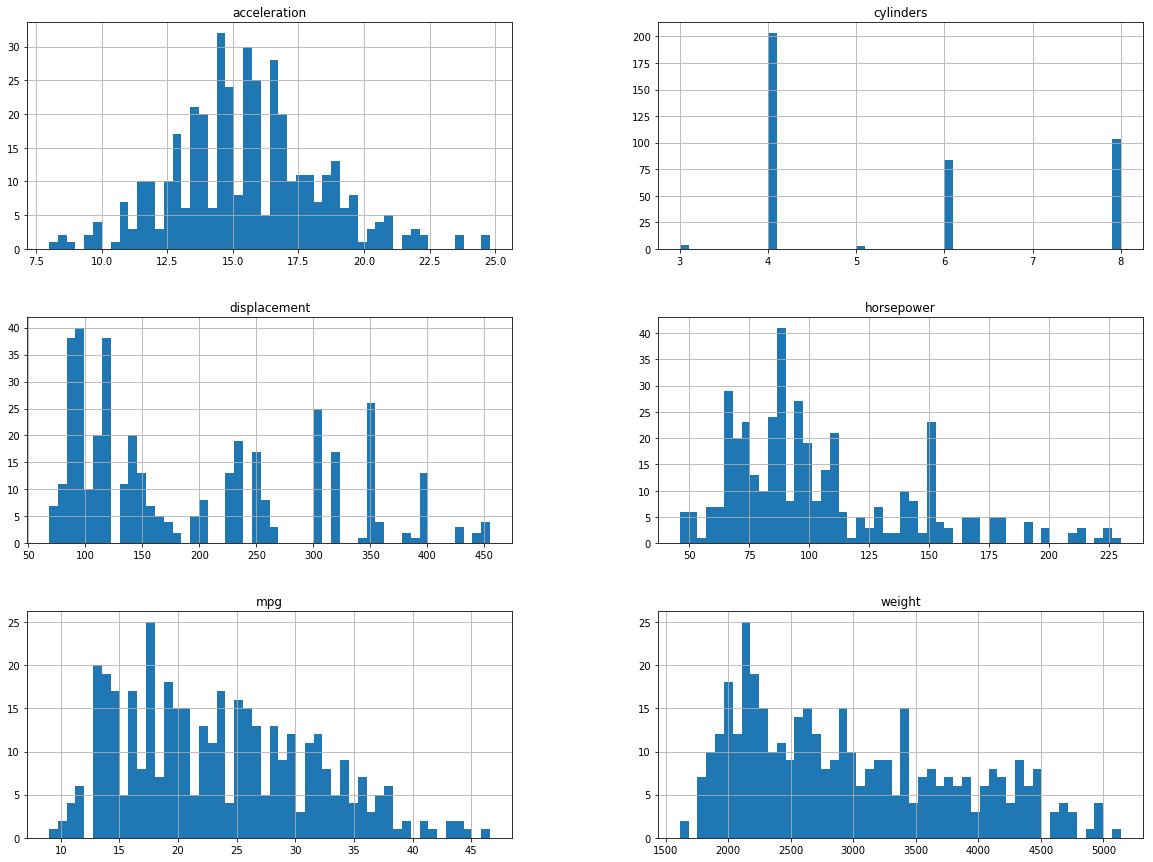

In [20]:
# gráfico de barras para cada feature
df.hist(bins=50, figsize=(20,15))
plt.show()

En los gráficos podemos ver que algunas muestran ser bastante simétricas ( ejemplo:acceleration )  y otras distribuciones asimétricas hacia la derecha (ejemplo:mpg, weight) esto es, la media caerá a la derecha de la mediana, pero, por lo que vemos, tampoco exageradamente, sino ligeramente.


In [21]:
# representación numérica de la matriz de correlación lineal entre las features.
correlacion=df.corr()
correlacion

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775344,-0.804232,-0.771317,-0.831867,0.420910
cylinders,-0.775344,1.000000,0.950629,0.838969,0.895815,-0.506820
displacement,-0.804232,0.950629,1.000000,0.893804,0.932674,-0.545281
horsepower,-0.771317,0.838969,0.893804,1.000000,0.860757,-0.684961
weight,-0.831867,0.895815,0.932674,0.860757,1.000000,-0.419029
acceleration,0.420910,-0.506820,-0.545281,-0.684961,-0.419029,1.000000


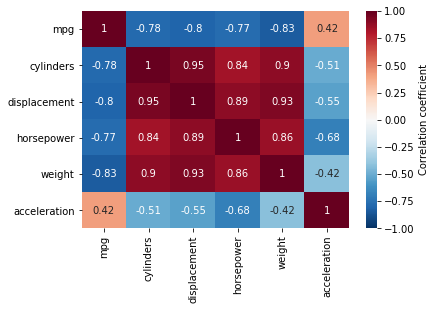

In [22]:
# Misma información anterior pero cuadrado más visual (todas las features y sus coeficientes de correlación lineal)
sns.heatmap(correlacion,
            cbar_kws={"label": "Correlation coefficient", "shrink": 1, "ticks": np.linspace(-1.0, 1.0, 9)}, 
            annot=True,
            cmap="RdBu_r", 
            vmin=-1, vmax=1)
plt.show()

Quitando el coeficiente de la diagonal, que es 1 porque es la correlación de la feature consigo misma, podemos decir que en general sí hay algunas fuertes relaciones lineales entre las features, sus coeficientes son relativamente altos; podemos destacar:
- La relación directa más fuerte (0.95) se da entre displacement y cylinders, así que seguramente podremos obviar alguna de las dos features (veremos más adelante).
- Otra relación fuerte  es entre weight y displacement (0.93), así que nos pasará como el caso anterior.
- Como relación inversa podemos encontrar weight con mpg (-0.83); cuando aumente una, disminuirá la otra. Al igual que mpg con displacement (-0.80)


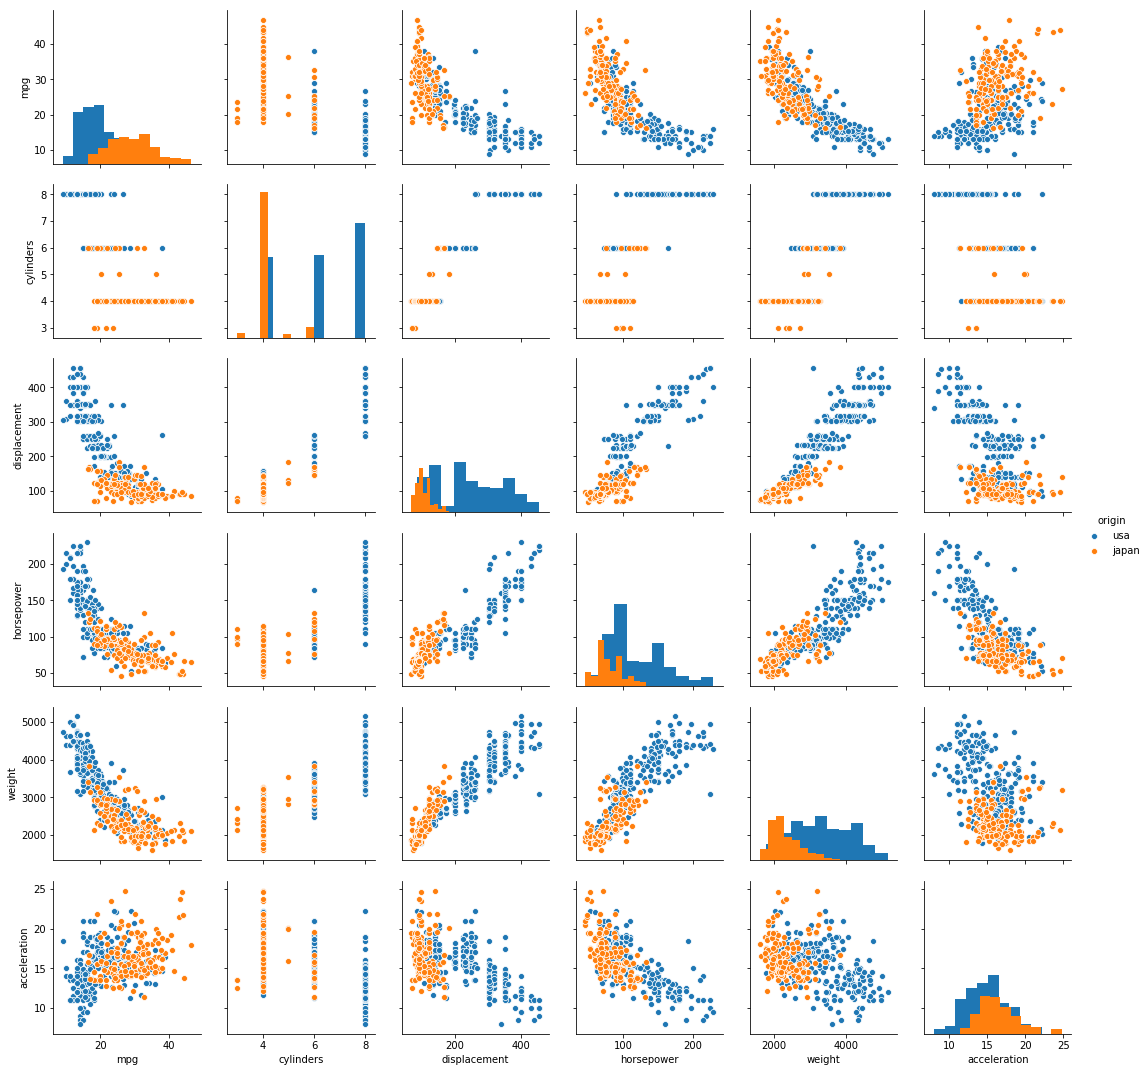

In [23]:
# Pairplot viene muy bien para visualización rápida de distribuciones, cuando tenemos muchas variables en nuestros dataframe
# No es nuestro caso, tenemos pocas features, pero podemos ver cómo se comporta la feature target "origin" USA (azul)
# y Japan (naranja) y en la diagonal principal aparece el histograma de cada feature
sns.pairplot(df, 
             hue=("origin"),
             diag_kind="hist")
pass



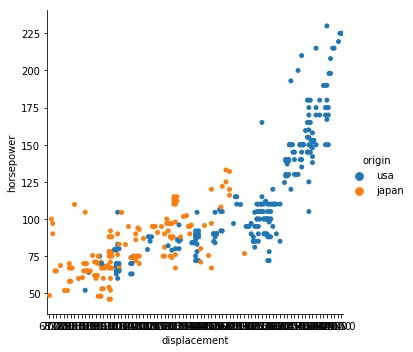

In [24]:
# Para análisis de modelo clasificación, va muy bien los gráficos catplot de seaborn. Comparamos una feature con otra
sns.catplot(data=df,  x="displacement", y="horsepower", kind="swarm",hue="origin")

In [25]:
# Detección de outliers
#Z score es un método rápido que nos puede dar pistas y ver posibles outliers
from scipy import stats

In [26]:
header = list(df)
header

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'origin',
 'name']

In [27]:
for feat in header:
    try:
        z = stats.zscore(df[feat])
        print("feature: " + feat + ". Max z-score: " + str(z.max()) + ". Min z-score: " + str(z.min()))
    except TypeError:
        print("Can't calculate z-score for feature " + feat + ". It's "+ str(type(df[feat].values[0])))
        pass

feature: mpg. Max z-score: 2.9554828112410387. Min z-score: -1.8563800023313655
feature: cylinders. Max z-score: 1.495535471379065. Min z-score: -1.4466230129494222
feature: displacement. Max z-score: 2.509008177739889. Min z-score: -1.2065299497489788
feature: horsepower. Max z-score: 3.285880242982827. Min z-score: -1.5321071250756357
feature: weight. Max z-score: 2.5626497141505946. Min z-score: -1.6074258832167285
feature: acceleration. Max z-score: 3.347356413389365. Min z-score: -2.745855468363285
Can't calculate z-score for feature origin. It's <class 'str'>
Can't calculate z-score for feature name. It's <class 'str'>


Con este análisis podemos decir que el rango de estas features no se dispara en exceso, está bastante controlado. Donde puede dar pie a saber que hay outliers podría ser en acceleration y horsepower . No obstante, miramos otras maneras:

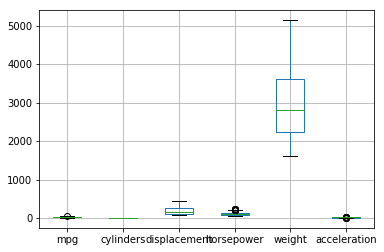

In [28]:
# a través de la visualización de diagramas de caja y bigotes podemos ver cómo algunas muestras se salen de los límites
df.boxplot(column=['mpg','cylinders', 'displacement',"horsepower","weight","acceleration",])

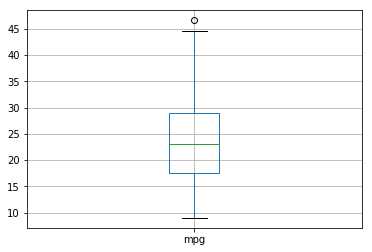

In [29]:
df.boxplot(column=['mpg'])

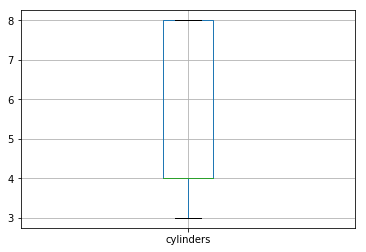

In [30]:
df.boxplot(column=["cylinders"])

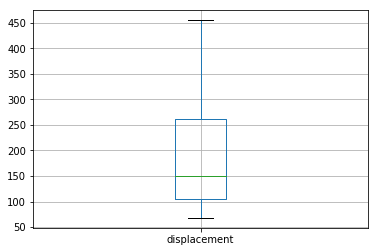

In [31]:
df.boxplot(column=["displacement"])

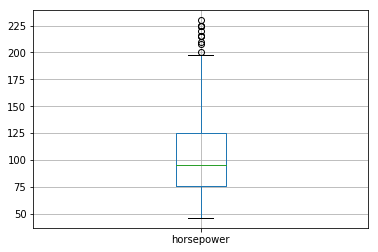

In [32]:
df.boxplot(column=['horsepower'])

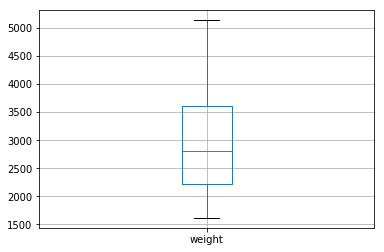

In [33]:
df.boxplot(column=["weight"])

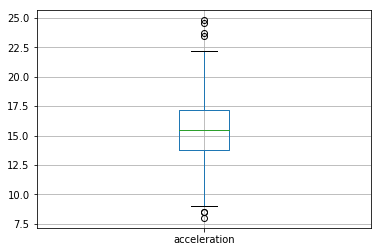

In [34]:
df.boxplot(column=["acceleration"])

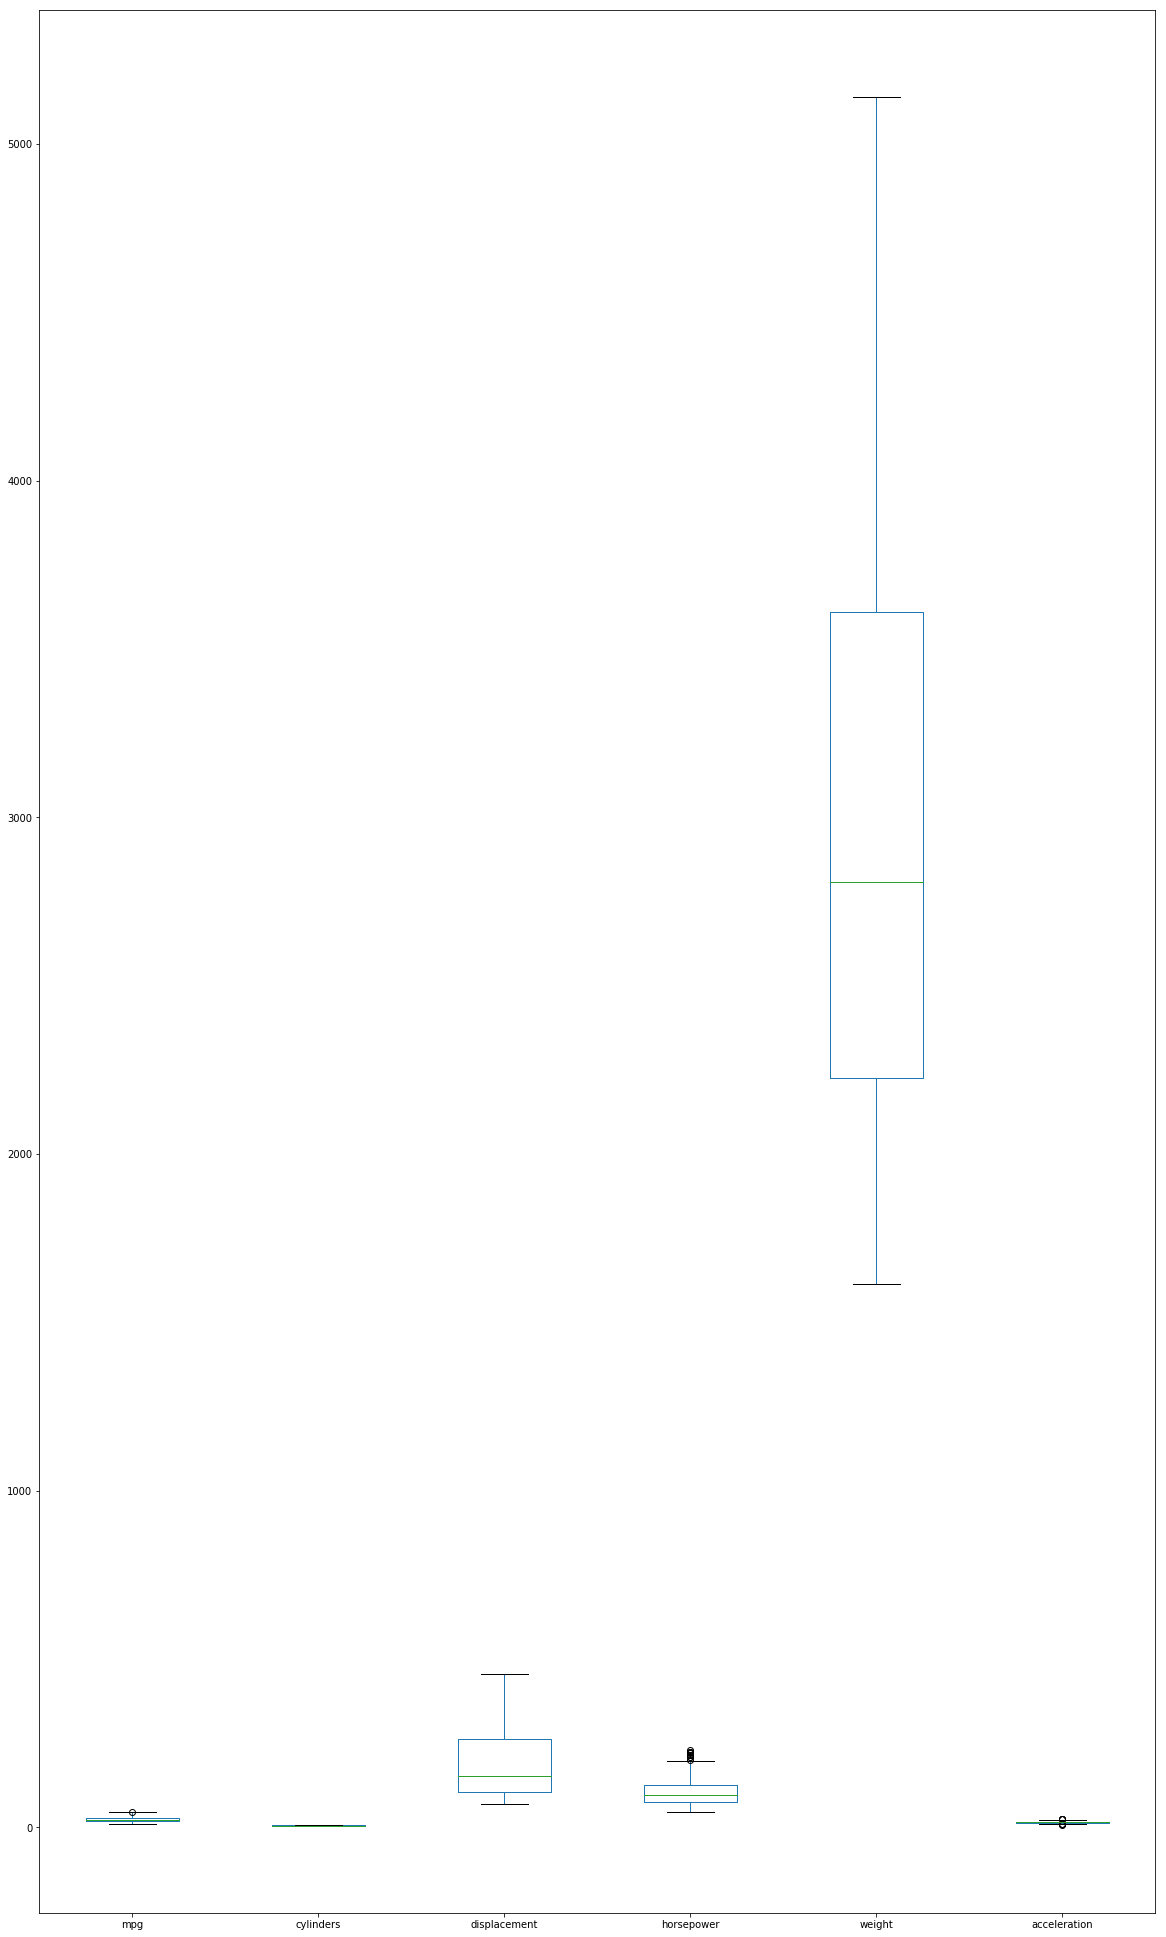

In [35]:
# aquí todas las features
df.plot(kind="box", figsize=(20,35))
pass

In [36]:
# Esta función mira la distribución de una feature, saber si es simétrica o asimétrica y nos sirve también para dar idea de
# detección de ouliers.
from scipy import stats
def normalidad_variable_numerica(col):
    stats.probplot(df[col], plot=plt)
    plt.xlabel('Diagrama de Probabilidad(normal) de la variable {}'.format(col))
    plt.show()

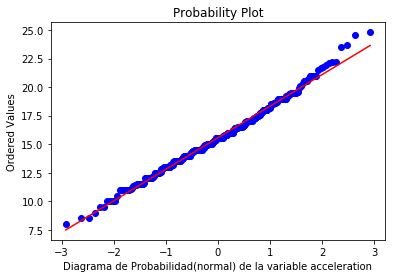

In [37]:
# A pesar de ver anteriormente que puede haber outliers en "acceleration", aquí parece seguir una distribución casi totalmente
# normal.
normalidad_variable_numerica("acceleration")

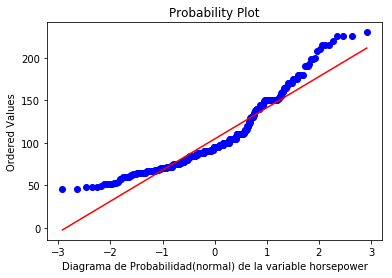

In [38]:
# aquí hay algunos puntos que se separan un poco del conjunto
normalidad_variable_numerica("horsepower")

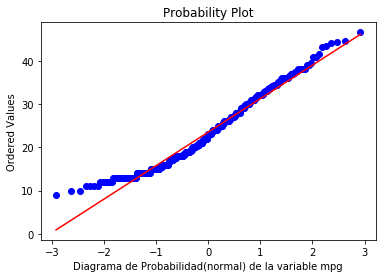

In [39]:
# aquí ya vemos unos casos que se separan bastante de la línea, aunque en general es bastante simétrica
normalidad_variable_numerica("mpg")

Ya hemos visto que hay algún outlier pero por ahora les tenemos en cuenta y tomamos nota para interpretación 
de modelos